In [7]:
import torch

torch.manual_seed(123)
# 一个元素全为5的张量
tensor = torch.tensor([6, 6, 6, 6,6,6,6,6,6])

# 取 top-3 的最大值和索引
values, indices = torch.topk(tensor, k=3)

print("Values:", values)
print("Indices:", indices)

>>
Values: tensor([6, 6, 6])
Indices: tensor([7, 5, 6])

Values: tensor([6, 6, 6])
Indices: tensor([7, 5, 6])


In [21]:
x = torch.tensor([612, 612, 612, 612, 612, 612])
x
torch.topk(x, 2, sorted=True)

torch.return_types.topk(
values=tensor([612, 612]),
indices=tensor([3, 5]))

# 汇总分数

In [5]:
result_dir = '/share/minghao/Projects/Video-XL/evluation/results/exp1/w_reload'

import os
import json

for name in os.listdir(result_dir):
    if 'final_result' in name:
        path = os.path.join(result_dir, name)
        with open(path, 'r') as file:
            data = json.load(file)
        acc = data['Avg']
        print(f'{name.split("final_result")[0]}: {acc}')


plotQA_: 90
order_: 90
needle_: 90
topic_reasoning_: 82.2


# 分析 top indice 的分布

In [1]:
import matplotlib.pyplot as plt
import pdb

def get_avg_chunk_size_by_chunkindex(all_chunks_length):

    chunk_idx_to_sum_chunk_len = {}
    chunk_idx_to_sum_chun_count = {}
    # pdb.set_trace()
    for question_idx, chunks_length_by_question in enumerate(all_chunks_length):
        for layer_idx, chunks_length_by_layer in enumerate(chunks_length_by_question):
            for chunk_idx, chunks_length in enumerate(chunks_length_by_layer):
                if chunk_idx not in chunk_idx_to_sum_chunk_len:
                    chunk_idx_to_sum_chunk_len[chunk_idx] = chunks_length
                    chunk_idx_to_sum_chun_count[chunk_idx] = 1
                else:
                    chunk_idx_to_sum_chunk_len[chunk_idx] = chunk_idx_to_sum_chunk_len[chunk_idx] + chunks_length
                    chunk_idx_to_sum_chun_count[chunk_idx] = chunk_idx_to_sum_chun_count[chunk_idx] + 1

    chunk_idx_to_avg_chunk_len = {}
    for chunk_idx in range(len(chunk_idx_to_sum_chunk_len)):
        chunk_idx_to_avg_chunk_len[chunk_idx] = chunk_idx_to_sum_chunk_len[chunk_idx] / chunk_idx_to_sum_chun_count[chunk_idx]

    return chunk_idx_to_avg_chunk_len, chunk_idx_to_sum_chunk_len, chunk_idx_to_sum_chun_count


def chunk_selected_statics(all_infos):

    count = {
        "pre 20%":0,
        "middle 60%":0,
        "post 20%":0,
    }

    count_by_chunk_index = {

    }

    for info in all_infos:
        for layer_top_indices in info:
            top_indices = layer_top_indices[0]
            chunk_num = layer_top_indices[-1]

            first_limit = int(chunk_num * 0.2)
            # print(f'first_limit:{first_limit}')
            second_limit = int(chunk_num * 0.8)
            # print(f'second_limit:{second_limit}')

            for index in top_indices:
                if index < first_limit:
                    count["pre 20%"] = count["pre 20%"] + 1
                elif index >= first_limit and index <= second_limit:
                    count["middle 60%"] = count["middle 60%"] + 1
                elif index > second_limit:
                    count["post 20%"] = count["post 20%"] + 1

                if index not in count_by_chunk_index:
                    count_by_chunk_index[index] = 1
                else:
                    count_by_chunk_index[index] += 1


    return count, count_by_chunk_index

def count_chunk_num(all_infos):
    count_chunk_num = {}
    for info in all_infos:
        chunk_num = info[0][-1]
        if chunk_num not in count_chunk_num:
            count_chunk_num[chunk_num] = 1
        else:
            count_chunk_num[chunk_num] += 1
    return count_chunk_num

def draw_histogram(count_by_chunk_index):

    # 数据
    data = count_by_chunk_index

    # 按 key 排序数据
    sorted_data = dict(sorted(data.items()))

    # 提取键和值
    keys = list(sorted_data.keys())
    values = list(sorted_data.values())

    # 绘制柱状图
    plt.figure(figsize=(12, 6))
    plt.bar(keys, values, color='skyblue', edgecolor='black')

    # 添加图表标题和坐标轴标签
    plt.title("Selected time with Chunk index", fontsize=16)
    plt.xlabel("Chunk index", fontsize=12)
    plt.ylabel("Selected time", fontsize=12)

    # 显示网格线
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # 显示图表
    plt.show()

def draw_histogram_certain_layer(count_by_chunk_index, layer_idx):

    # 数据
    data = count_by_chunk_index

    # 按 key 排序数据
    sorted_data = dict(sorted(data.items()))

    # 提取键和值
    keys = list(sorted_data.keys())
    values = list(sorted_data.values())

    # 绘制柱状图
    plt.figure(figsize=(12, 6))
    plt.bar(keys, values, color='skyblue', edgecolor='black')

    # 添加图表标题和坐标轴标签
    plt.title(f"Selected time with Chunk index Layer {layer_idx}", fontsize=16)
    plt.xlabel("Chunk index", fontsize=12)
    plt.ylabel("Selected time", fontsize=12)

    # 显示网格线
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # 显示图表
    plt.show()


def chunk_selected_statics_certain_layer(all_infos, layer_index):

    count = {
        "pre 20%":0,
        "middle 60%":0,
        "post 20%":0,
    }

    count_by_chunk_index = {

    }

    for info in all_infos:
        for idx, layer_top_indices in enumerate(info):
            if idx != layer_index:
                continue

            top_indices = layer_top_indices[0]
            chunk_num = layer_top_indices[1]

            first_limit = int(chunk_num * 0.2)
            # print(f'first_limit:{first_limit}')
            second_limit = int(chunk_num * 0.8)
            # print(f'second_limit:{second_limit}')

            for index in top_indices:
                if index < first_limit:
                    count["pre 20%"] = count["pre 20%"] + 1
                elif index >= first_limit and index <= second_limit:
                    count["middle 60%"] = count["middle 60%"] + 1
                elif index > second_limit:
                    count["post 20%"] = count["post 20%"] + 1

                if index not in count_by_chunk_index:
                    count_by_chunk_index[index] = 1
                else:
                    count_by_chunk_index[index] += 1


    return count, count_by_chunk_index 


In [10]:
# EXP 1 
result_log_path = '/share/minghao/Projects/Video-XL/evluation/logs/exp1/w_reload/topic_reasoning_reload.log'
result_log_path = '/share/minghao/Projects/Video-XL/evluation/logs/exp1/w_reload/needle_reload.log'
result_log_path = '/share/minghao/Projects/Video-XL/evluation/logs/exp1/w_reload/plotQA_reload.log'
result_log_path = '/share/minghao/Projects/Video-XL/evluation/logs/exp1/w_reload/order_reload.log'

# EXP 2
result_log_path = '/share/minghao/Projects/Video-XL/evluation/logs/exp2/w_k3/topic_reasoning_reload.log'
result_log_path = '/share/minghao/Projects/Video-XL/evluation/logs/exp2/w_k3/needle_reload.log'
result_log_path = '/share/minghao/Projects/Video-XL/evluation/logs/exp2/w_k3/plotQA_reload.log'
result_log_path = '/share/minghao/Projects/Video-XL/evluation/logs/exp2/w_k3/order_reload.log'




total question: 1
layer num: 28
chunk num distribution: {26: 1}
chunk selected statics : {'pre 20%': 70, 'middle 60%': 12, 'post 20%': 2}
count by chunk index : {25: 1, 1: 26, 0: 27, 3: 2, 24: 1, 7: 1, 2: 15, 8: 1, 11: 10}


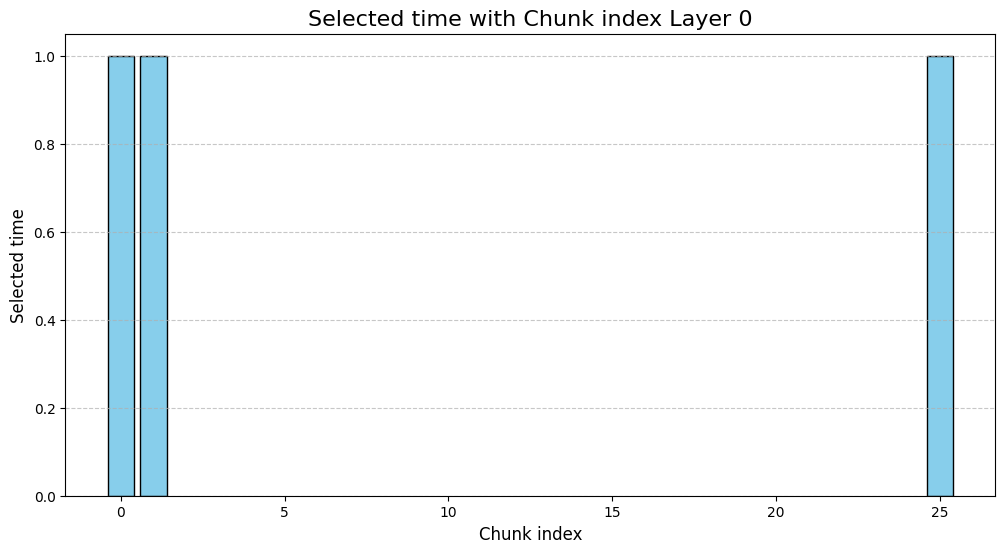

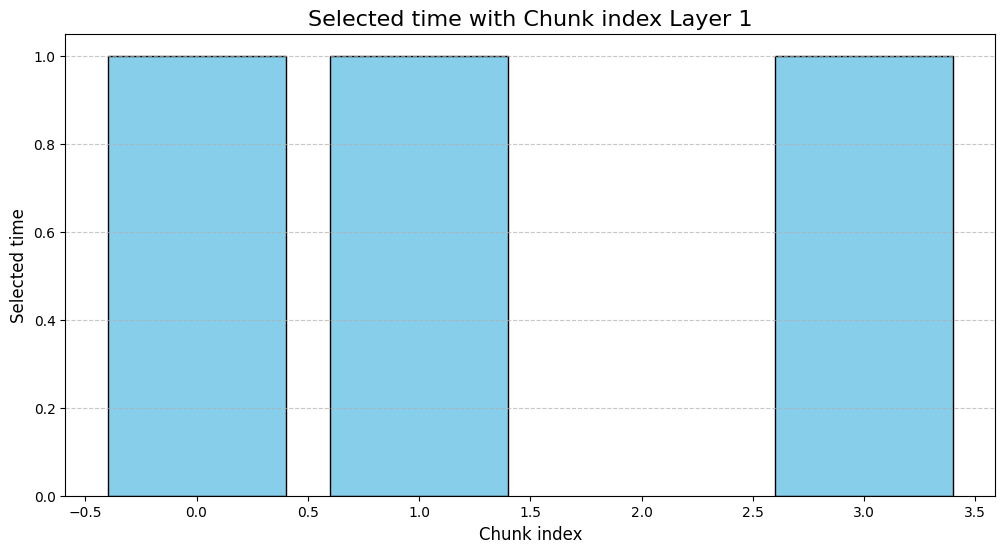

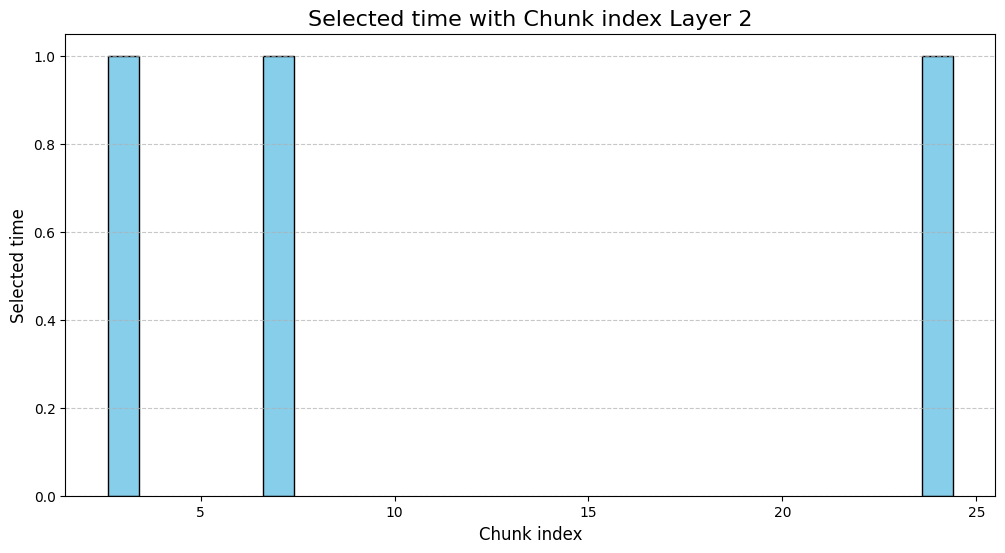

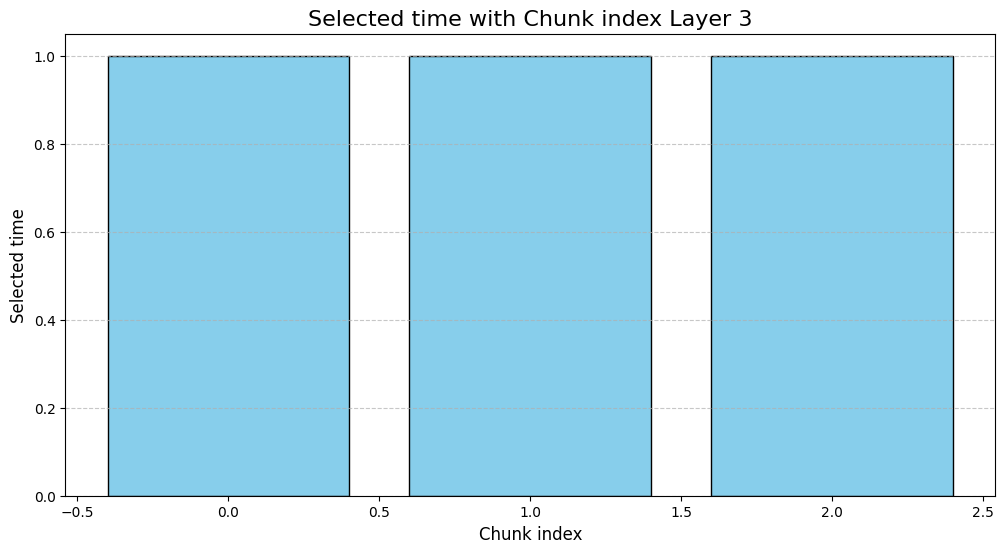

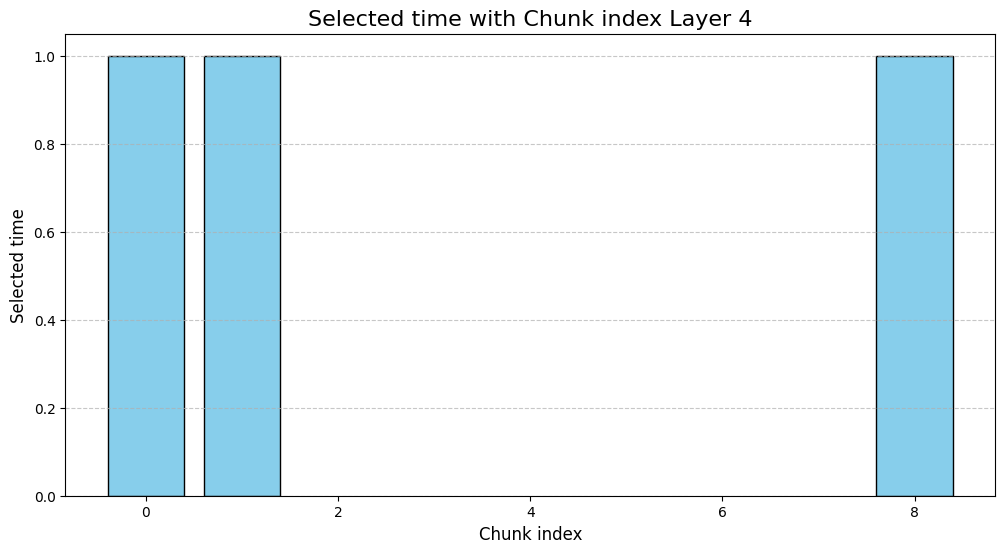

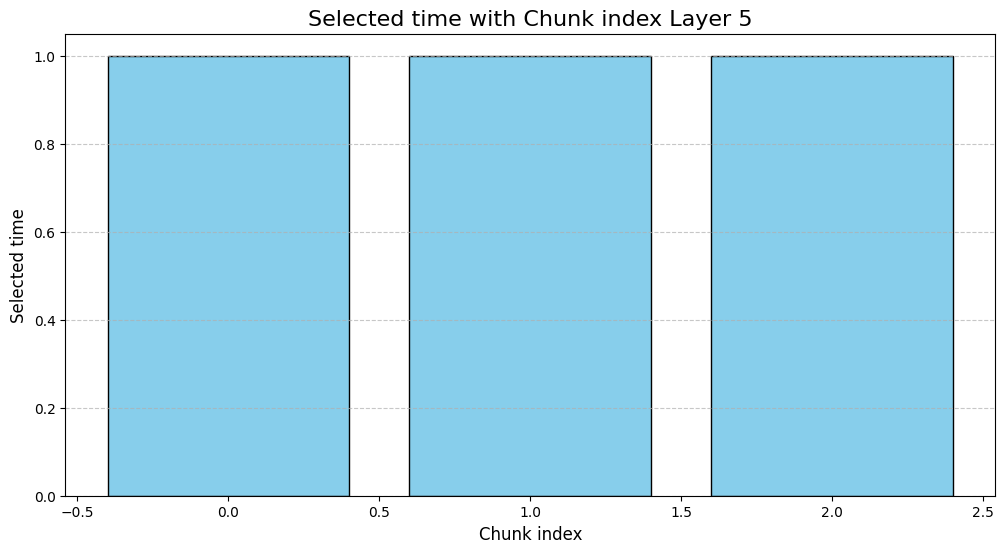

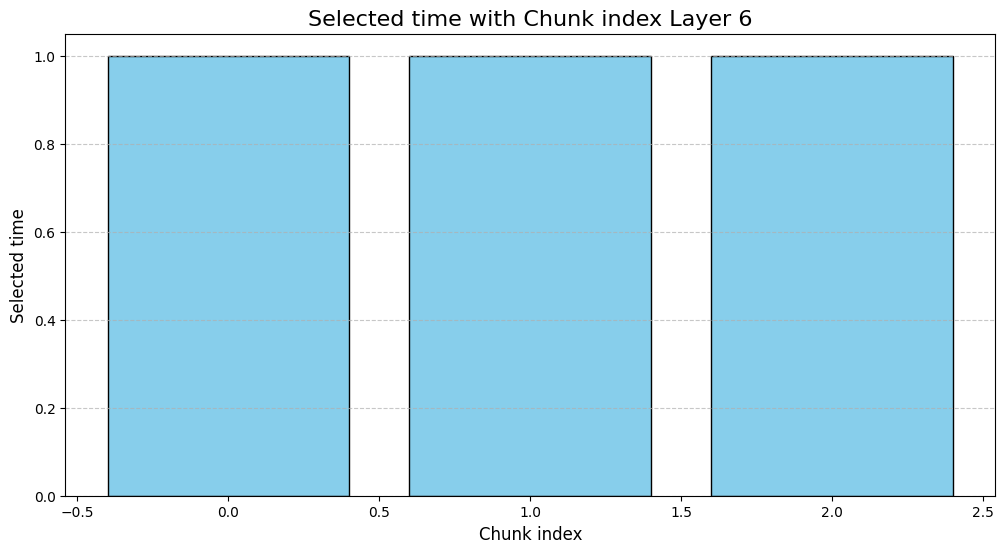

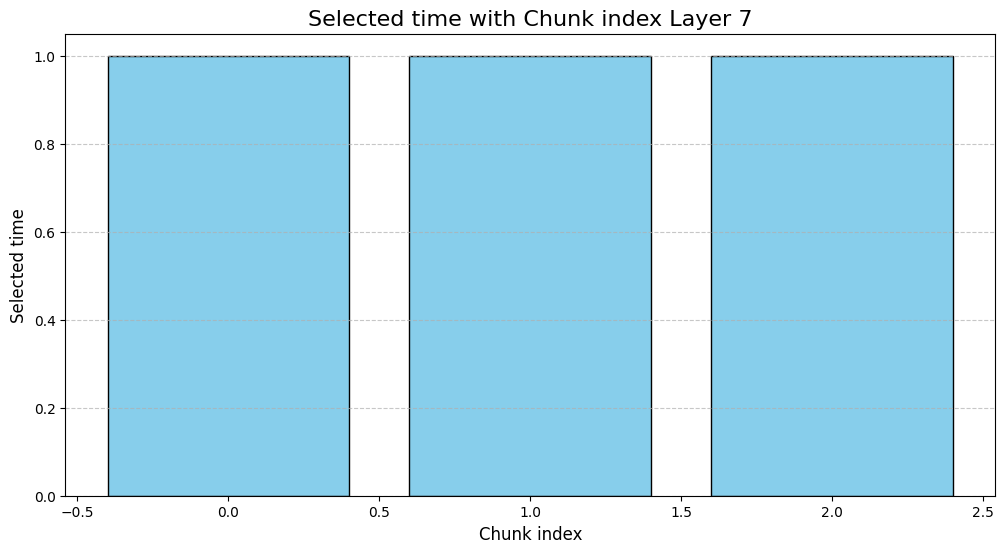

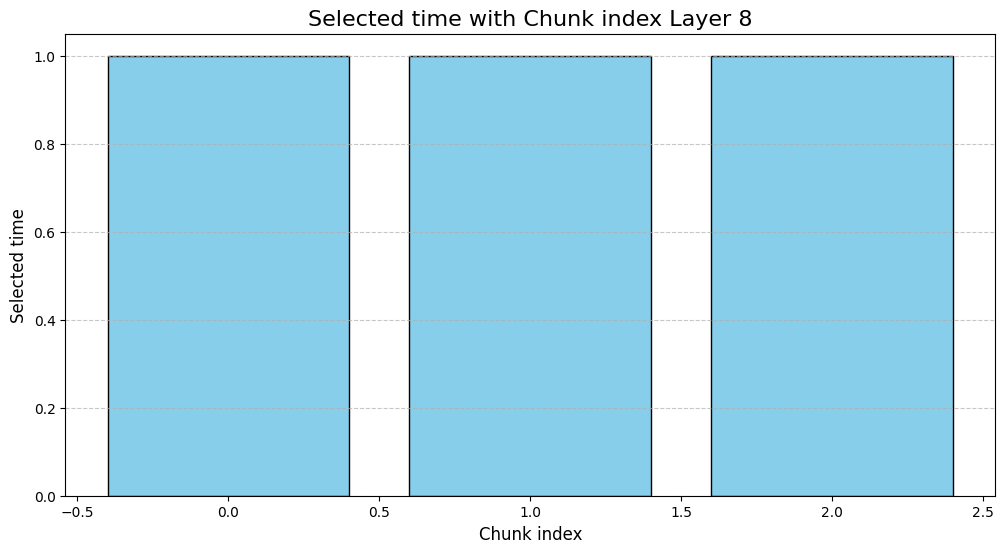

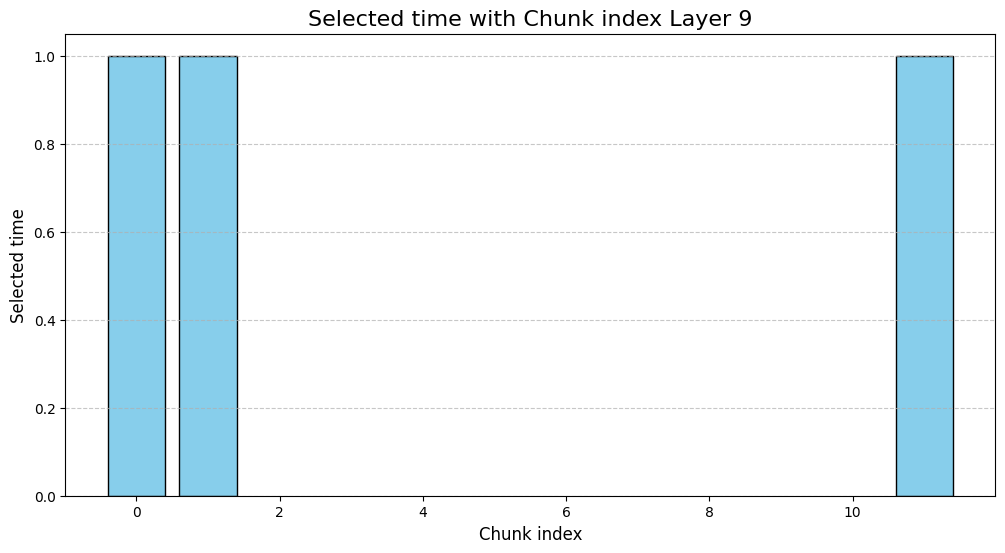

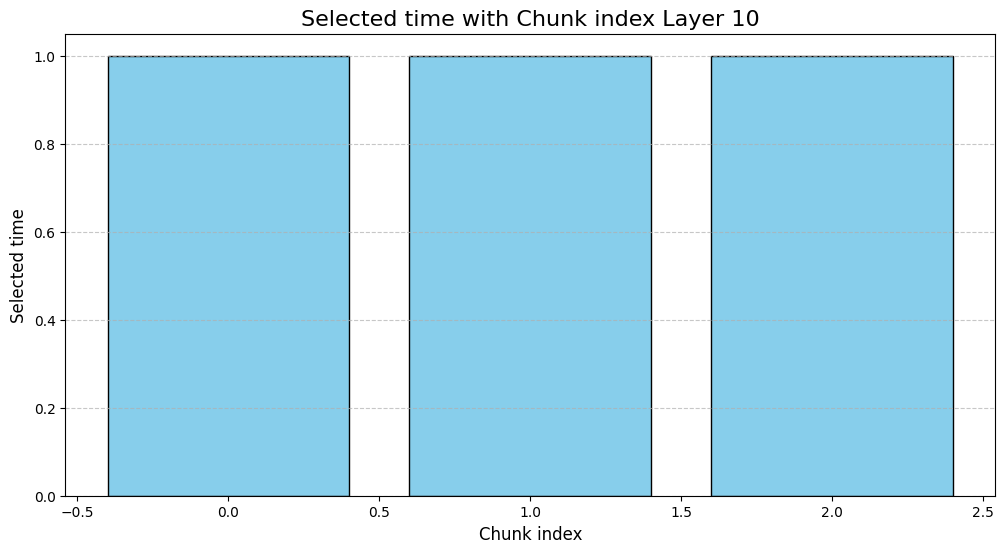

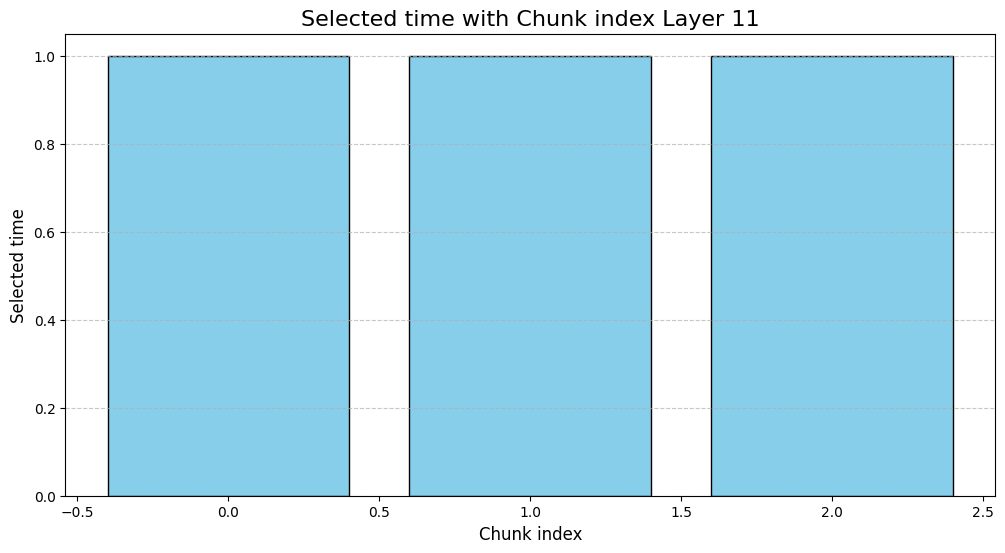

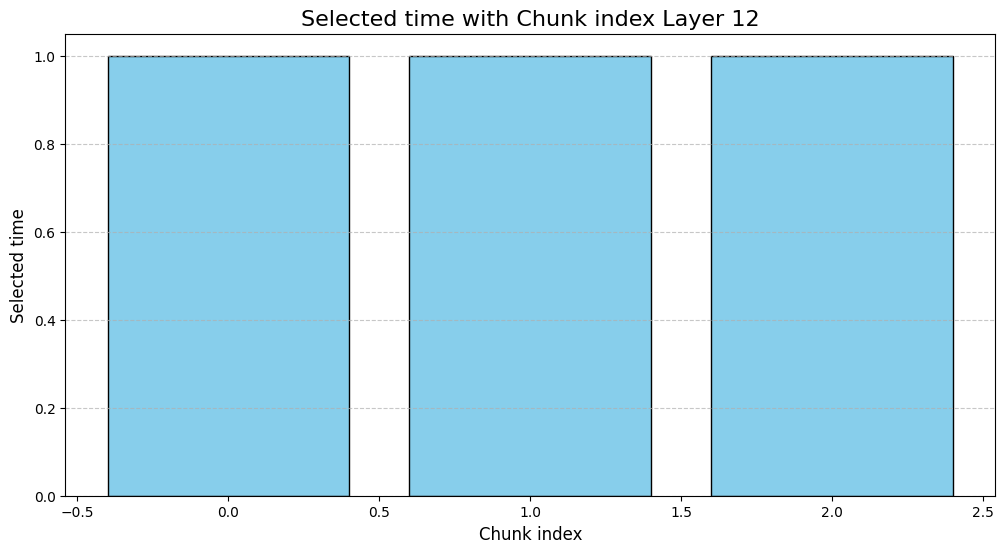

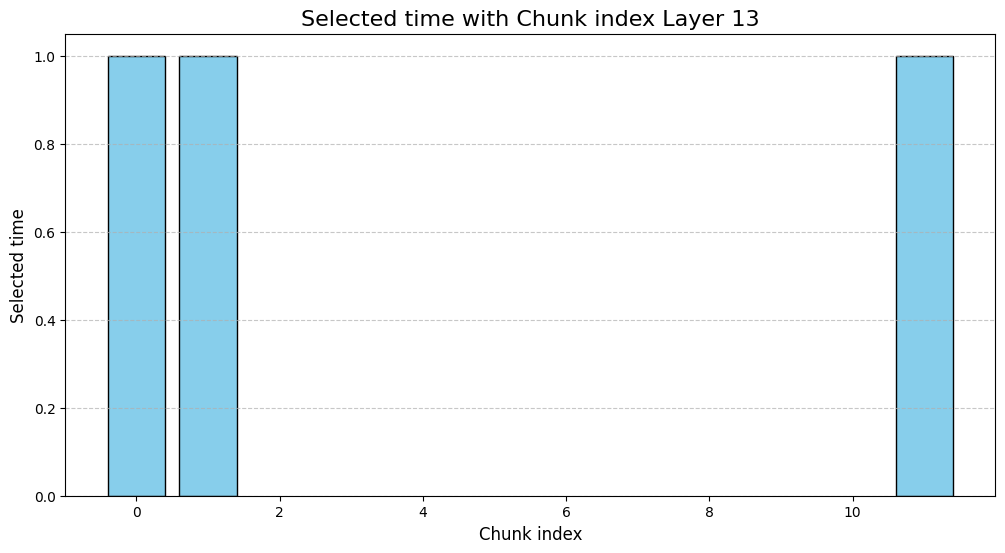

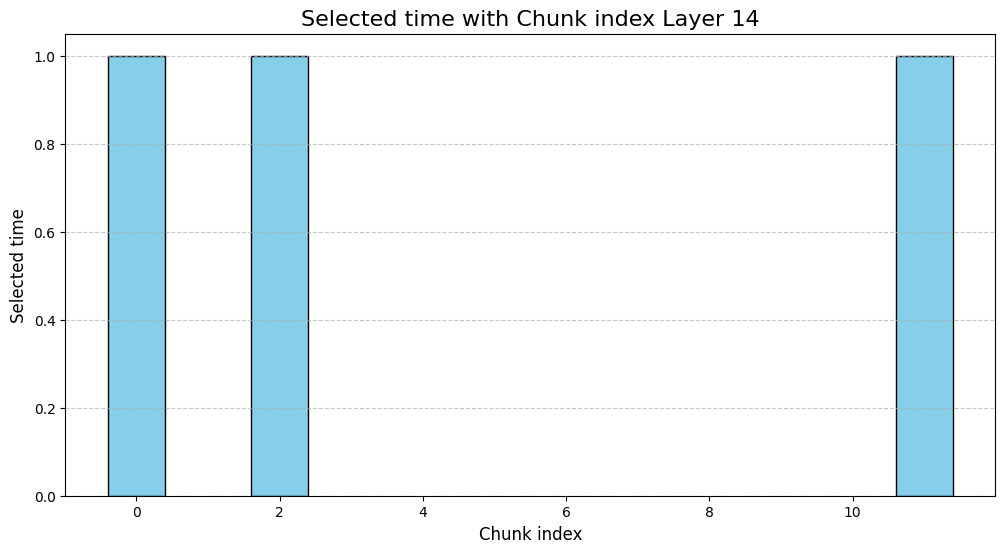

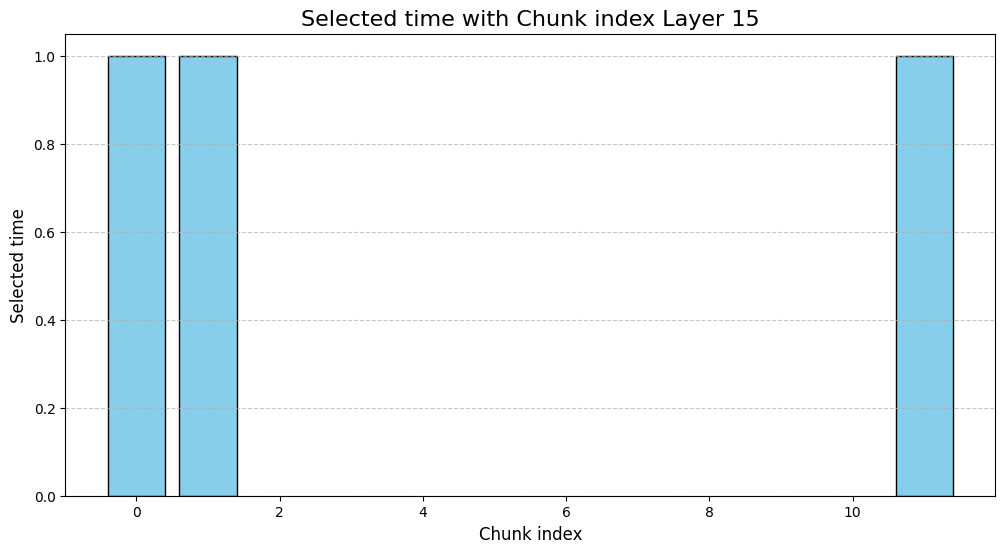

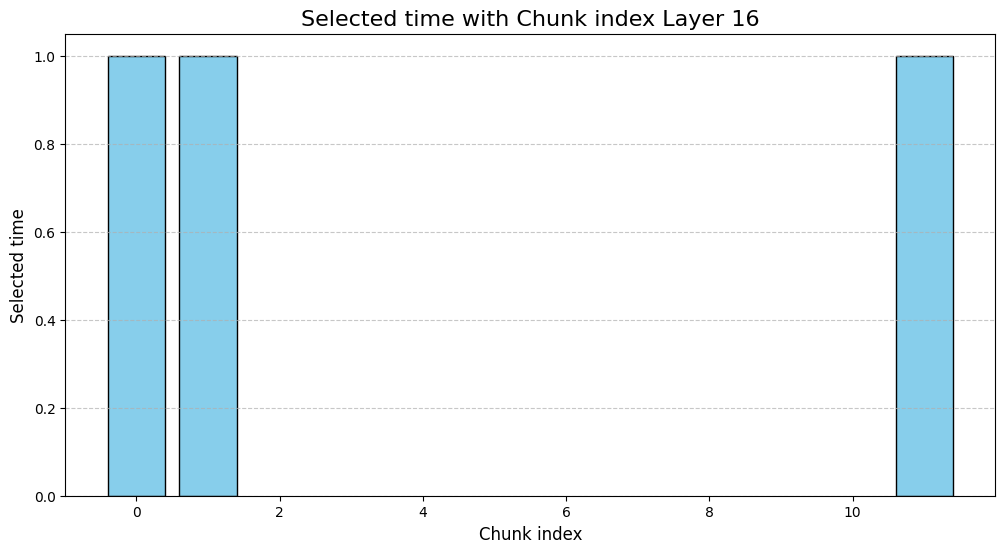

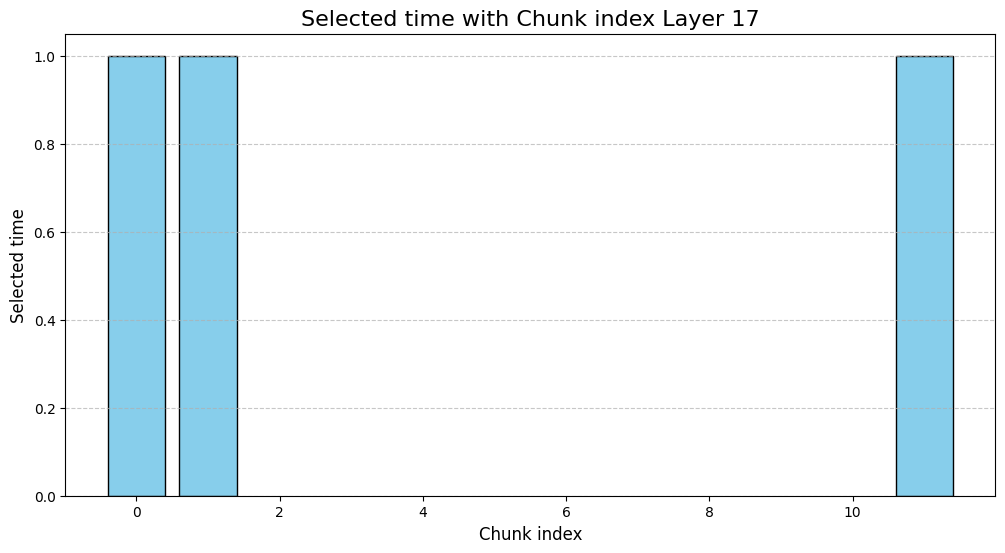

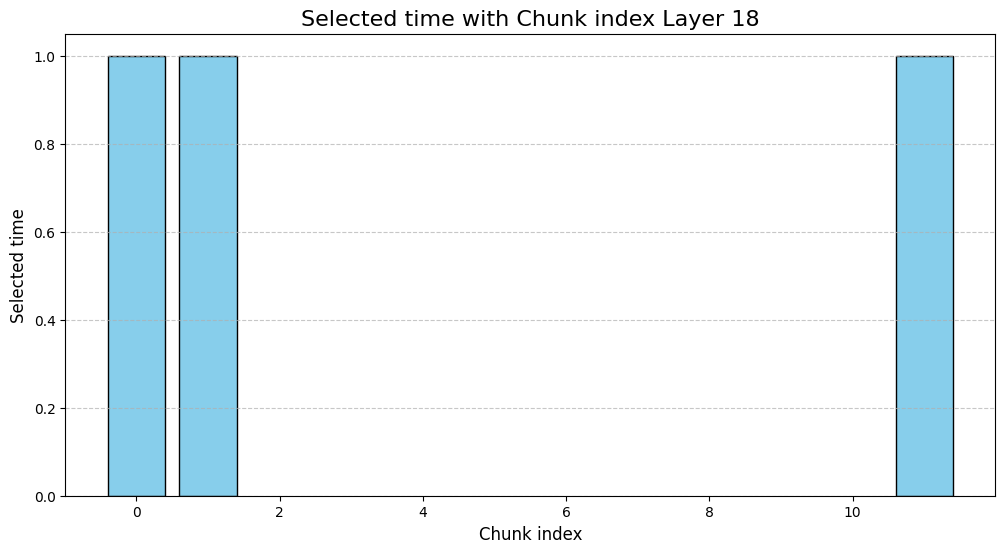

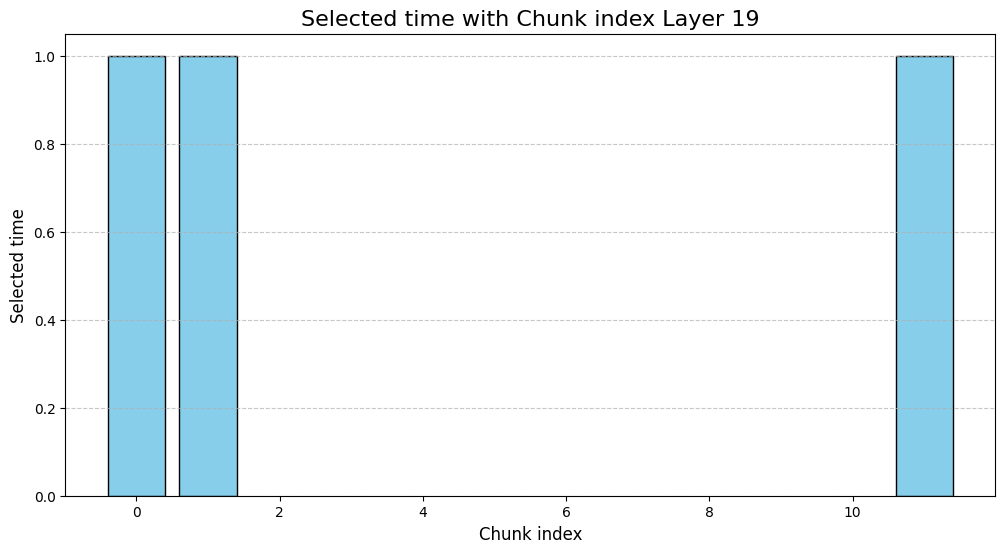

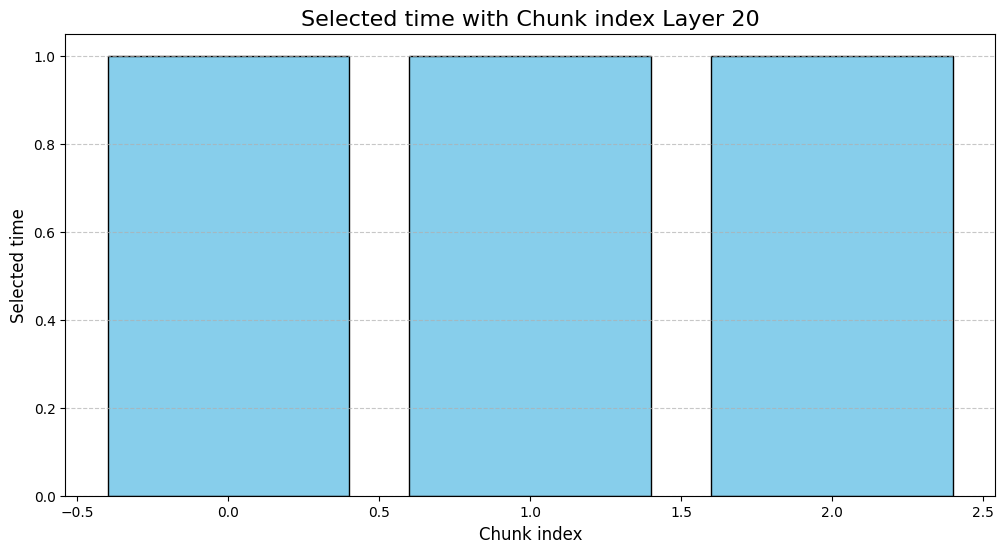

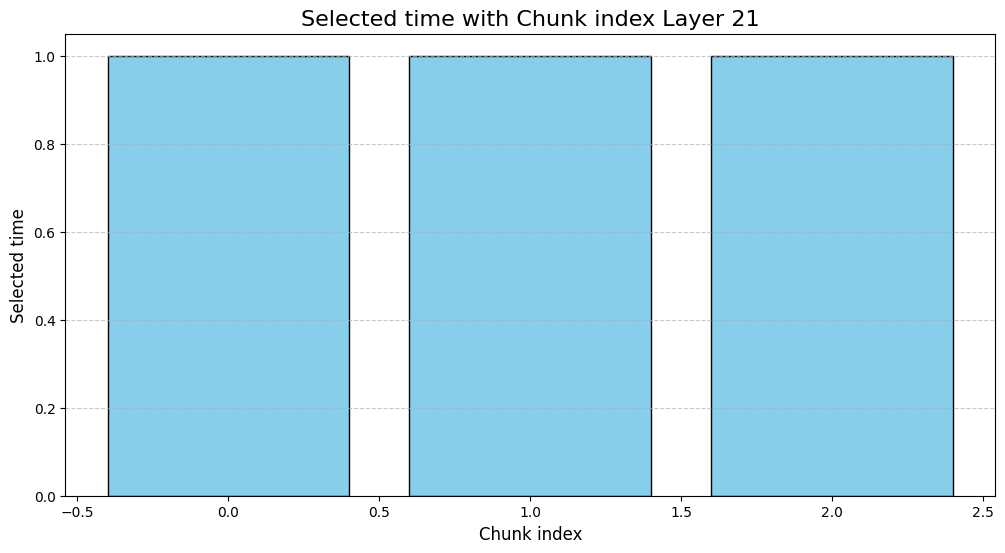

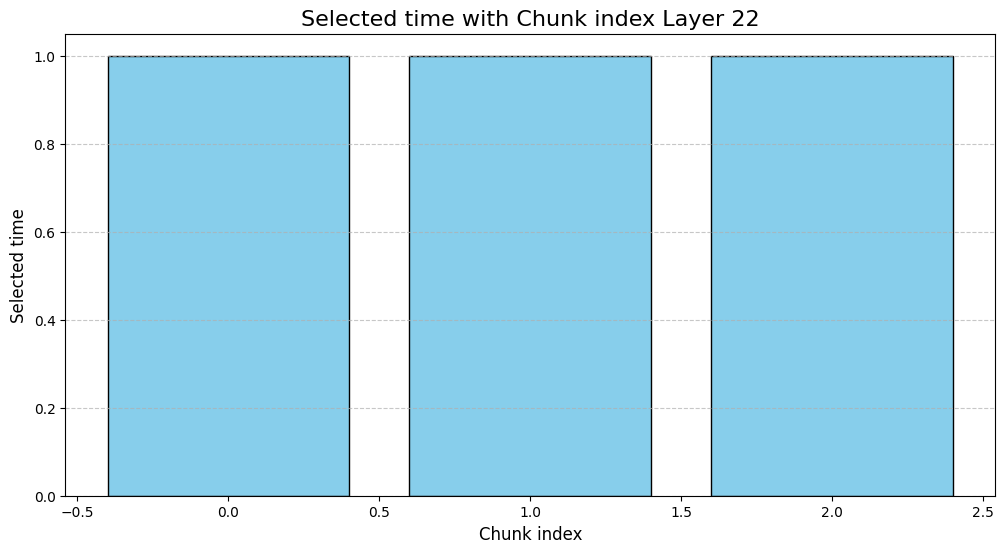

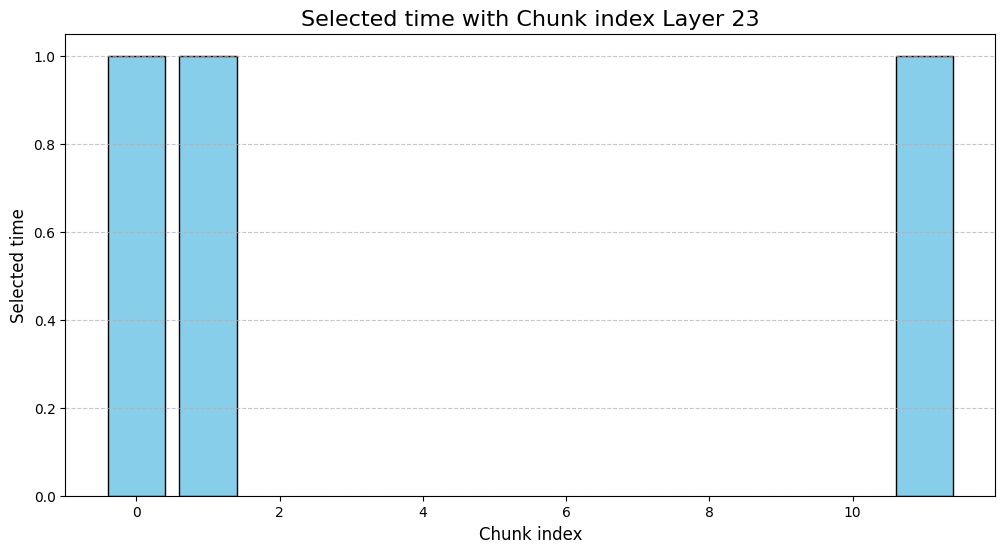

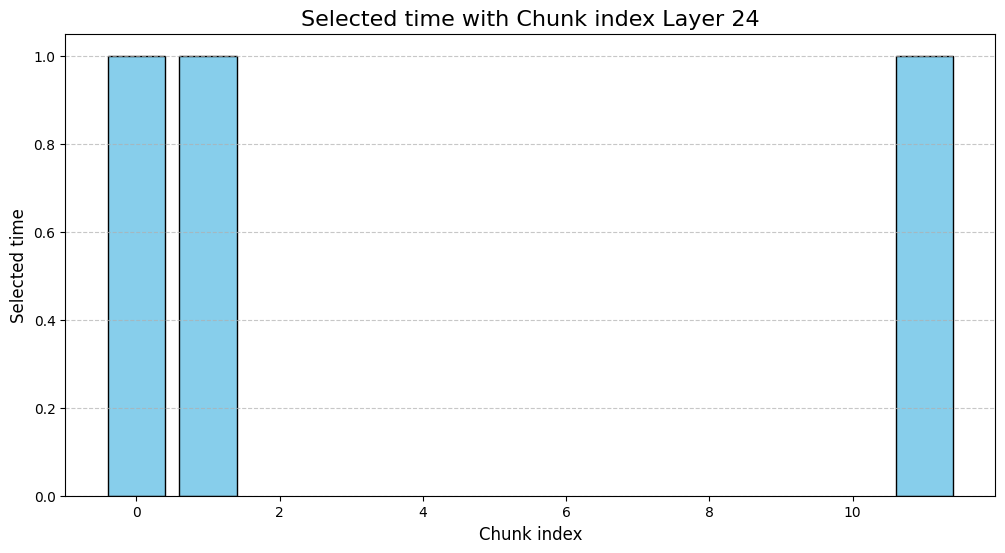

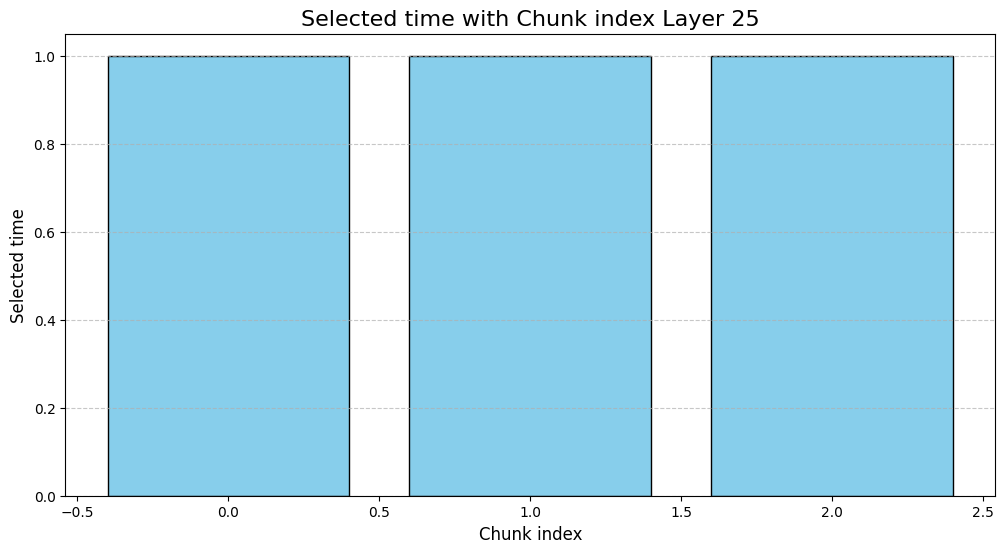

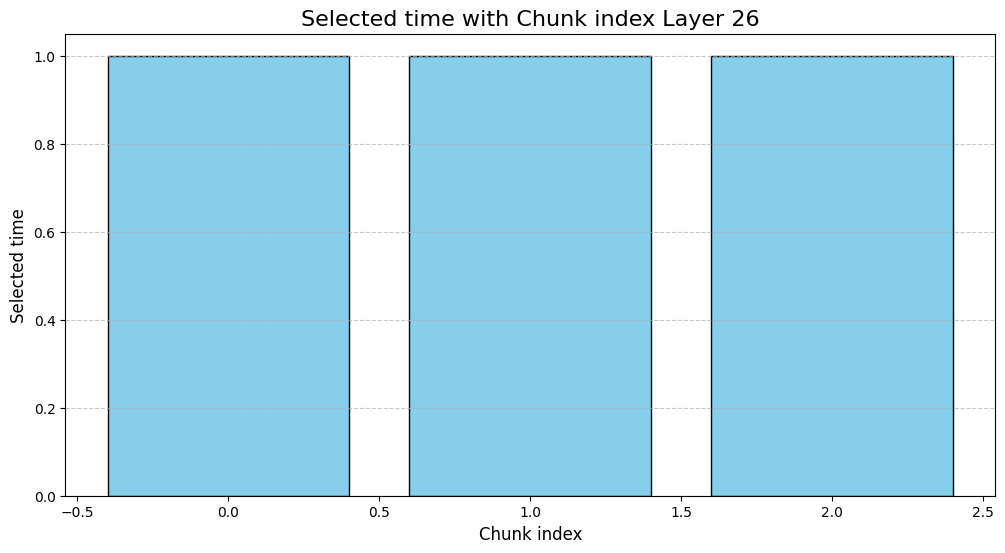

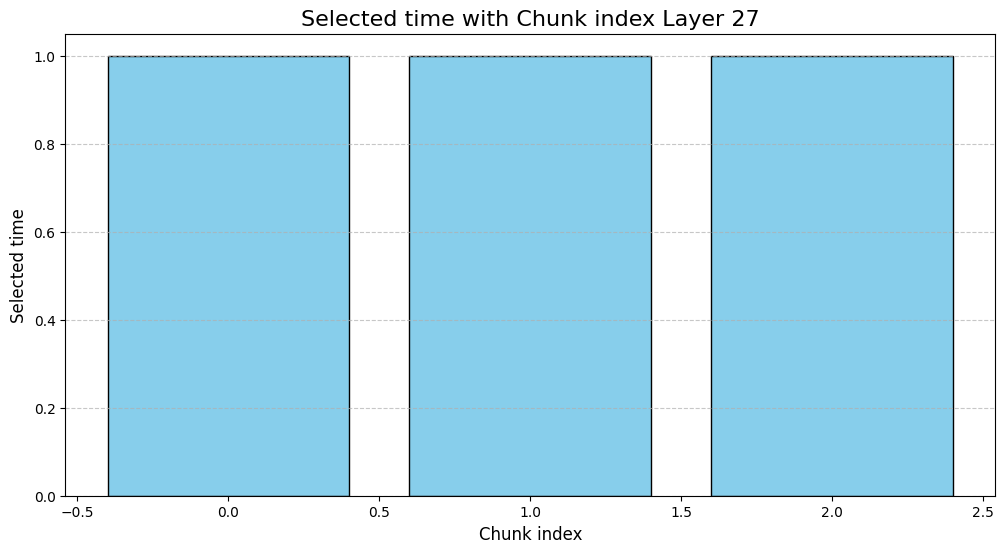

In [5]:
# result_log_path = '/share/minghao/Projects/Video-XL/evluation/logs/exp2/w_k3_nopos/needle_reload.log'
result_log_path = '/share/minghao/Projects/Video-XL/logs/exp2/wo_k3_nopos_biattn_demo/demo.log'

# 每个问题每一层的 top indices 存起来

all_infos = []
all_chunks_num = []
all_chunks_length = []

new_question = []
all_chunks_length_by_layer = []
with open(result_log_path, 'r') as result_log:
    for line in result_log:
        if  "Layer_Idx: 0" in line:
            if new_question:
                all_infos.append(new_question)
                all_chunks_length.append(all_chunks_length_by_layer)
            new_question = []
            all_chunks_length_by_layer = []

        if 'Chunks Num' in line:
            chunks_num = line.split(":")[-1].split('\x1b[0m')[0].strip()
            chunks_num = int(chunks_num)
            all_chunks_num.append(chunks_num)

        if 'Chunks:' in line:
            chunks = line.split(":")[-1].split('\x1b[0m')[0].strip()
            chunks = eval(chunks)
            # the len of every chunk
            chunks_len = [
                chunk[-1]-chunk[-2] for chunk in chunks
            ]
            all_chunks_length_by_layer.append(chunks_len)

        if 'topk_indices' in line:
            left_pos = line.find('([')
            right_pos = line.find(']')
            topk_indices = eval(line[left_pos+1:right_pos+1])

            new_question.append((topk_indices,chunks_num))
        

all_infos.append(new_question)
all_chunks_length.append(all_chunks_length_by_layer)

# 先统计所有问题下，chunks num 在 20 以上， 前 20% chunk, 中间 60%, 后 20%chunk 被选中的次数和占比

print(f'total question: {len(all_infos)}')
print(f'layer num: 28')
chunk_num_distribution = count_chunk_num(all_infos)
print(f"chunk num distribution: {chunk_num_distribution}")
chunk_statics, count_by_chunk_index = chunk_selected_statics(all_infos)
print(f"chunk selected statics : {chunk_statics}")
print(f"count by chunk index : {count_by_chunk_index}")

# draw_histogram(count_by_chunk_index)
for certain_layer_idx in range(0, 28):
    chunk_statics_certain_layer, count_by_chunk_index_certain_layer = chunk_selected_statics_certain_layer(all_infos, certain_layer_idx)

    # print(f'ceratin_layer: {certain_layer_idx}')
    draw_histogram_certain_layer(count_by_chunk_index_certain_layer, certain_layer_idx)


# chunk_idx_to_avg_chunk_len, chunk_idx_to_sum_chunk_len, chunk_idx_to_sum_chun_count = get_avg_chunk_size_by_chunkindex(all_chunks_length)